Check out the impact of galactic extinction correction

In [1]:
import os
import h5py
import numpy as np
import astropy.units as u
# -- local -- 
import env
from feasibgs import util as UT
from feasibgs import catalogs as Cat

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [4]:
gamaleg = Cat.GamaLegacy()
gleg = gamaleg.Read(silent=True)

Legacy photometry

In [39]:
bands = ['g', 'r', 'z']

In [5]:
legacy_photo = np.array([gleg['legacy-photo']['flux_'+b] for b in ['g', 'r', 'z']])

In [42]:
#legacy_modelmag = np.array([UT.flux2mag(gleg['legacy-photo']['flux_'+b], band=b) for b in ['g', 'r', 'z']])
legacy_modelmag = np.array([22.5 - 2.5*np.log10(gleg['legacy-photo']['flux_'+b]) for b in ['g', 'r', 'z']])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


galactic extinction correction

In [8]:
A_EBV_grz = [3.214, 2.165, 1.211] # A/E(B-V)

In [14]:
A_grz = np.array([r * gleg['legacy-photo']['ebv'] for r in A_EBV_grz])

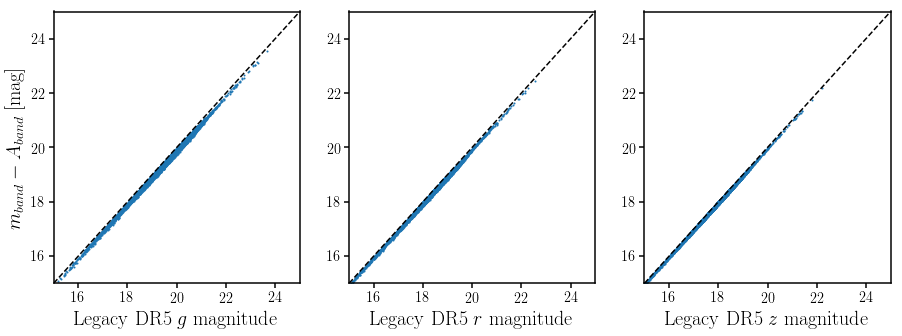

In [52]:
fig = plt.figure(figsize=(15, 5))
for i in range(len(bands)):
    sub = fig.add_subplot(1,3,i+1)
    sub.scatter(legacy_modelmag[i], legacy_modelmag[i] - A_grz[i], s=1)
    sub.plot([15., 25.], [15., 25.], c='k', ls='--')
    sub.set_xlabel('Legacy DR5 $'+bands[i]+'$ magnitude', fontsize=20)
    sub.set_xlim([15., 25.])
    if i == 0: sub.set_ylabel('$m_{band} - A_{band}$ [mag]', fontsize=20)
    sub.set_ylim([15., 25.])

GAMA model magnitudes

In [32]:
gama_modelmag = np.array([gleg['gama-photo']['modelmag_'+b] for b in ['g', 'r', 'z']])
# extinction corrected
gama_modelmag_corr = np.array([gleg['gama-kcorr-z0.1'][b+'_model'] for b in ['g', 'r', 'z']])

<Figure size 432x288 with 0 Axes>

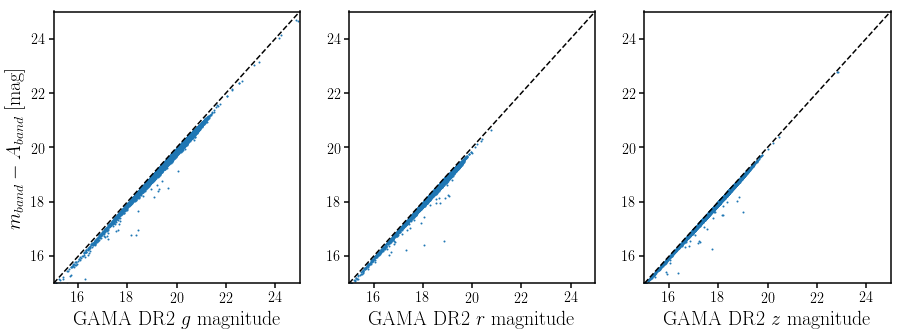

In [53]:
fig = plt.figure(figsize=(15, 5))
for i in range(len(bands)):
    sub = fig.add_subplot(1,3,i+1)
    sub.scatter(gama_modelmag[i], gama_modelmag_corr[i], s=1)
    sub.plot([15., 25.], [15., 25.], c='k', ls='--')
    sub.set_xlabel('GAMA DR2 $'+bands[i]+'$ magnitude', fontsize=20)
    sub.set_xlim([15., 25.])
    if i == 0: sub.set_ylabel('$m_{band} - A_{band}$ [mag]', fontsize=20)
    sub.set_ylim([15., 25.])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


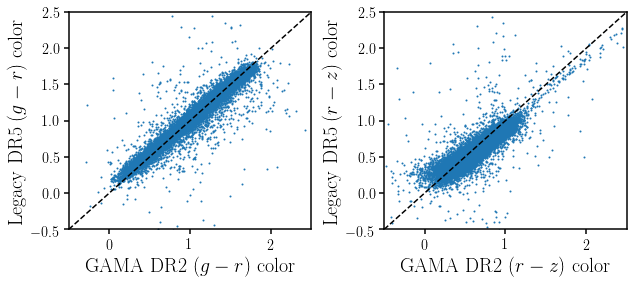

In [56]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(121)
sub.scatter(gama_modelmag[0] - gama_modelmag[1], 
            legacy_modelmag[0]-legacy_modelmag[1], s=1)
sub.plot([-0.5, 2.5], [-0.5, 2.5], c='k', ls='--')
sub.set_xlabel('GAMA DR2 $(g-r)$ color', fontsize=20)
sub.set_xlim([-0.5, 2.5])
sub.set_ylabel('Legacy DR5 $(g-r)$ color', fontsize=20)
sub.set_ylim([-0.5, 2.5])

sub = fig.add_subplot(122)
sub.scatter(gama_modelmag[1] - gama_modelmag[2], 
            legacy_modelmag[1]-legacy_modelmag[2], s=1)
sub.plot([-0.5, 2.5], [-0.5, 2.5], c='k', ls='--')
sub.set_xlabel('GAMA DR2 $(r-z)$ color', fontsize=20)
sub.set_xlim([-0.5, 2.5])
sub.set_ylabel('Legacy DR5 $(r-z)$ color', fontsize=20)
sub.set_ylim([-0.5, 2.5])
fig.subplots_adjust(wspace=0.3)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


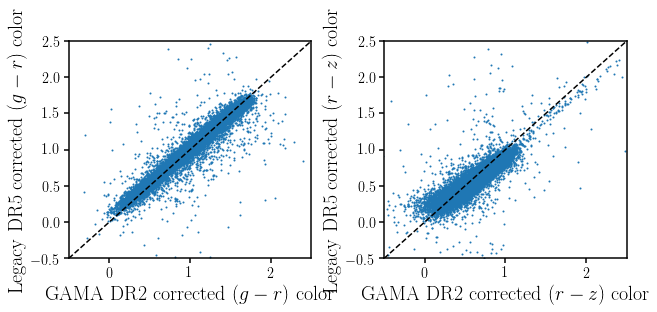

In [58]:
fig = plt.figure(figsize=(10,4))
sub = fig.add_subplot(121)
sub.scatter(gama_modelmag_corr[0] - gama_modelmag_corr[1], 
            legacy_modelmag[0] - A_grz[0] - legacy_modelmag[1] + A_grz[1], s=1)
sub.plot([-0.5, 2.5], [-0.5, 2.5], c='k', ls='--')
sub.set_xlabel('GAMA DR2 corrected $(g-r)$ color', fontsize=20)
sub.set_xlim([-0.5, 2.5])
sub.set_ylabel('Legacy DR5 corrected $(g-r)$ color', fontsize=20)
sub.set_ylim([-0.5, 2.5])

sub = fig.add_subplot(122)
sub.scatter(gama_modelmag_corr[1] - gama_modelmag_corr[2], 
            legacy_modelmag[1] - A_grz[1] - legacy_modelmag[2] + A_grz[2], s=1)
sub.plot([-0.5, 2.5], [-0.5, 2.5], c='k', ls='--')
sub.set_xlabel('GAMA DR2 corrected $(r-z)$ color', fontsize=20)
sub.set_xlim([-0.5, 2.5])
sub.set_ylabel('Legacy DR5 corrected $(r-z)$ color', fontsize=20)
sub.set_ylim([-0.5, 2.5])
fig.subplots_adjust(wspace=0.3)

In [36]:
gama_ha = gleg['gama-spec']['ha']

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


(0.01, 10000.0)

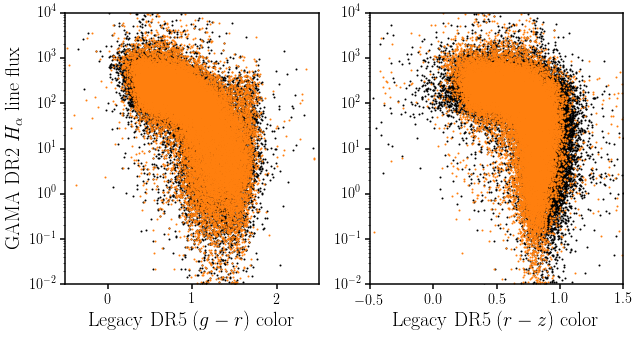

In [60]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(121)
sub.scatter(gama_modelmag[0] - gama_modelmag[1], gama_ha, c='k', s=1) 
sub.scatter(legacy_modelmag[0] - legacy_modelmag[1], gama_ha, c='C1', s=1)
sub.set_xlabel('Legacy DR5 $(g-r)$ color', fontsize=20)
sub.set_xlim([-0.5, 2.5])
sub.set_ylabel(r'GAMA DR2 $H_\alpha$ line flux', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])

sub = fig.add_subplot(122)
sub.scatter(gama_modelmag[1] - gama_modelmag[2], gama_ha, c='k', s=1) 
sub.scatter(legacy_modelmag[1] - legacy_modelmag[2], gama_ha, c='C1', s=1)
sub.set_xlabel('Legacy DR5 $(r-z)$ color', fontsize=20)
sub.set_xlim([-0.5, 1.5])
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.
/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


(0.01, 10000.0)

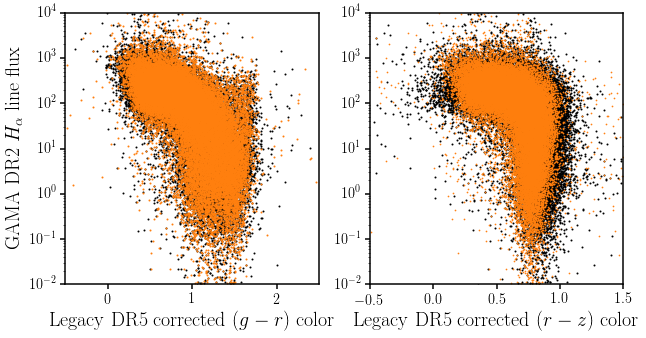

In [61]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(121)
sub.scatter(gama_modelmag_corr[0] - gama_modelmag_corr[1], gama_ha, c='k', s=1) 
sub.scatter(legacy_modelmag[0] - legacy_modelmag[1] - A_grz[0] + A_grz[1], gama_ha, c='C1', s=1)
sub.set_xlabel('Legacy DR5 corrected $(g-r)$ color', fontsize=20)
sub.set_xlim([-0.5, 2.5])
sub.set_ylabel(r'GAMA DR2 $H_\alpha$ line flux', fontsize=20)
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])

sub = fig.add_subplot(122)
sub.scatter(gama_modelmag_corr[1] - gama_modelmag_corr[2], gama_ha, c='k', s=1) 
sub.scatter(legacy_modelmag[1] - legacy_modelmag[2] - A_grz[1] + A_grz[2], gama_ha, c='C1', s=0.5)
sub.set_xlabel('Legacy DR5 corrected $(r-z)$ color', fontsize=20)
sub.set_xlim([-0.5, 1.5])
sub.set_yscale('log')
sub.set_ylim([1e-2, 1e4])